<h3>Questions</h3>
<ol>
    <li>How did all Democratic candidates perform in the districts compared to Joe Biden?</li>
    <li>How did all Republican candidates perform in the districts compared to Donald Trump?</li>
    <li>How did Democratic winners perform in the districts compared to Joe Biden?</li>
    <li>How did Republican winners perform in the districts compared to Donald Trump?</li>
    <li>Which party's House incumbents underperformed more relative to presidential numbers, Democrats or Republicans?</li>
</ol>

In [183]:
import csv
import numpy as np
import pandas as pd
from pandas import DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import normalize

%matplotlib inline

In [184]:
diff = pd.read_csv('Pres_vs_House.csv')

In [185]:
diff.head()

,District,Party,2020DPCT_P,2020RPCT_P,2020DPCT_H,2020RPCT_H
0,AL-01,Republican,35.3,63.7,35.5,64.4
1,AL-02,Republican,35.1,63.9,34.7,65.2
2,AL-03,Republican,33.7,65.3,32.5,67.5
3,AL-04,Republican,17.8,81.2,17.7,82.2
4,AL-05,Republican,35.7,62.7,0.0,95.8


In [186]:
diff.Party.unique()

array(['Republican', 'Democratic', 'Vacant (D)', 'Vacant (R)'],
      dtype=object)

In [187]:
#Replace vacant seats with respective party labels
diff.loc[(diff.Party == 'Vacant (D)'), 'Party'] = 'Democratic'
diff.loc[(diff.Party == 'Vacant (R)'), 'Party'] = 'Republican'

In [188]:
#Columns of the differences between House performances and Presidential performances

diff['DEM_Diff'] = diff['2020DPCT_H'] - diff['2020DPCT_P']
diff['REP_Diff'] = diff['2020RPCT_H'] - diff['2020RPCT_P']
diff.head()

,District,Party,2020DPCT_P,2020RPCT_P,2020DPCT_H,2020RPCT_H,DEM_Diff,REP_Diff
0,AL-01,Republican,35.3,63.7,35.5,64.4,0.2,0.7
1,AL-02,Republican,35.1,63.9,34.7,65.2,-0.4,1.3
2,AL-03,Republican,33.7,65.3,32.5,67.5,-1.2,2.2
3,AL-04,Republican,17.8,81.2,17.7,82.2,-0.1,1.0
4,AL-05,Republican,35.7,62.7,0.0,95.8,-35.7,33.1


1. How did all Democratic candidates perform in the districts compared to Joe Biden?

In [189]:
diff['DEM_Diff'].mean()

-1.0862068965517242

Democratic candidates performed about 1 point below Joe Biden.

2. How did all Republican candidates perform in the districts compared to Donald Trump?

In [190]:
diff['REP_Diff'].mean()

0.3664367816091953

Republican candidates performed about 0.36 points above Donald Trump.

3. How did Democratic winners perform in the districts compared to Joe Biden?

In [191]:
dem_win = diff[(diff["Party"] == 'Democratic')]
dem_win['DEM_Diff'].mean()

1.0198198198198192

Democratic winners performed about 1 point above Joe Biden.

4. How did Republican winners perform in the districts compared to Donald Trump?

In [192]:
rep_win = diff[(diff["Party"] == 'Republican')]
rep_win['REP_Diff'].mean()

3.276995305164318

Republican winners performed about 3.3 points above than Donald Trump.

5. Which party's House incumbents underperformed more relative to presidential numbers, Democrats or Republicans?

In [193]:
party_diff = diff[['DEM_Diff', 'REP_Diff']]
party_diff.head()

,DEM_Diff,REP_Diff
0,0.2,0.7
1,-0.4,1.3
2,-1.2,2.2
3,-0.1,1.0
4,-35.7,33.1


<AxesSubplot:ylabel='Frequency'>

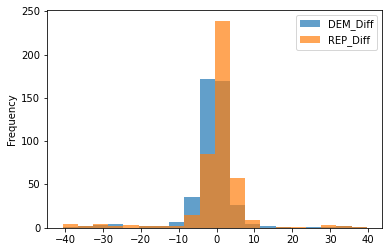

In [194]:
party_diff.plot.hist(bins=20, alpha=0.7)

<AxesSubplot:>

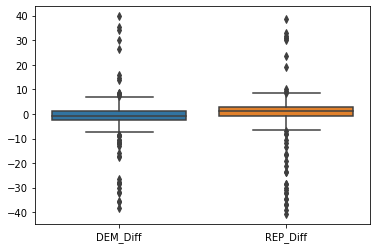

In [195]:
sns.boxplot(data = party_diff)

<AxesSubplot:xlabel='Party', ylabel='DEM_Diff'>

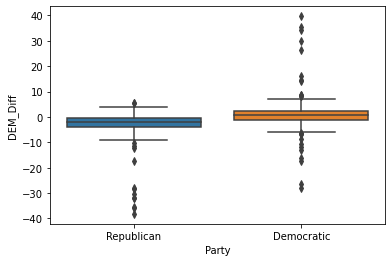

In [196]:
sns.boxplot(x = 'Party', y = 'DEM_Diff', data = diff)

<AxesSubplot:xlabel='Party', ylabel='REP_Diff'>

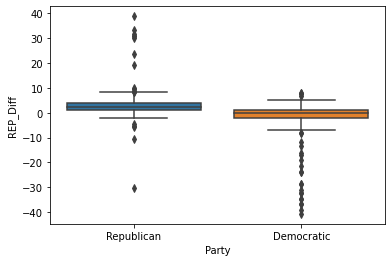

In [197]:
sns.boxplot(x = 'Party', y = 'REP_Diff', data = diff)

In [198]:
#Normalize age and time served for Democrats
party_diff = preprocessing.normalize(party_diff[['DEM_Diff', 'REP_Diff']], axis=0)

#Convert array to DataFrame
party_diff = pd.DataFrame(party_diff)

#Rename column heads
party_diff.rename(columns={0:'DEM_Diff', 1:'REP_Diff'}, inplace=True)
party_diff.head()

,DEM_Diff,REP_Diff
0,0.001362,0.004176
1,-0.002725,0.007756
2,-0.008174,0.013125
3,-0.000681,0.005966
4,-0.243188,0.197477


In [199]:
party_diff['DEM_Diff'].mean()

-0.00739923812425539

In [200]:
party_diff['REP_Diff'].mean()

0.0021861894194610157

Null hypothesis: Democrats performed the same relative to Biden as Republicans performed relative to Trump.<br><br>
Alternate hypothesis: Democrats performed significantly different relative to Biden as Republicans did to Trump.

In [175]:
party_diff = stats.ttest_ind(party_diff['DEM_Diff'], party_diff['REP_Diff'])
display(party_diff)

Ttest_indResult(statistic=-2.964256832849132, pvalue=0.003117125939951357)

The p-value from comparing the means between Democratic and Republican performances is low enough that the null hypotheses is rejected. There is a statistically significant difference between the mean of the differences between Democratic House candidates' performances relative to Biden, and the mean of the differences between Republican House candidates' performances relative to Trump.